In [ ]:
!nvidia-smi

# RUN THIS FIRST

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import librosa
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display
import glob
import soundfile as sf
import os
from os import path
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
!pip install -Uqq fastbook
import fastbook
from fastbook import *
!mkdir /content/spectrain
!mkdir /content/spectest


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.4 MB/s eta 0:00:00


In [ ]:
drumdat = glob.glob('/content/drive/MyDrive/one shot but two/done/*')

xtrain,xtest,ytrain,ytest = [],[],[],[]
for fol in drumdat :
  pxtrain = []
  pytrain = []
  pxtrain = glob.glob(f'{fol}/*')
  for a in pxtrain:
    pytrain += [parent_label(a)]
  for i in range(int(len(pxtrain)/10)):
    xtest.append(pxtrain[i])
    ytest.append(pytrain[i])
    pxtrain.pop(i)
    pytrain.pop(i)
  xtrain += pxtrain
  ytrain += pytrain
for name in drumdat:
  os.mkdir(f'spectrain/{name.split("/")[-1]}')





# ไม่ตัดเสียง

In [ ]:
num = 0
for drum_file in xtrain:
  y1,sr1=librosa.load(drum_file)
  thepath = f'spectrain/{drum_file.split("/")[-2]}/'

    #change to spectrogram
  S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=550)
  log_S = librosa.power_to_db(S, ref=np.max)
  plt.figure(figsize=(12,4))
  spectrogram = librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')

  plt.savefig(path.join(thepath,str(num).zfill(4)))
  num = num +1
  


<ipython-input-4-95df8cf37c30>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))


In [ ]:
num = 0
for drum_file in xtest:
  y1,sr1=librosa.load(drum_file)
  thepath = f'spectest/'

    #change to mel-spectrogram
  S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=550)
  log_S = librosa.power_to_db(S, ref=np.max)
  plt.figure(figsize=(8,4))
  spectrogram = librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')
  # plt.title('mel power spectrogram')
  # plt.colorbar(format='%+02.0f dB')
  # plt.tight_layout()
  plt.savefig(path.join(thepath,str(num).zfill(4)))
  num = num +1

# ตัดเสียง

In [ ]:
# num = 0
# for drum_file in all_file:
#     #rmeove the silence at the begining and the end
#   y,sr = librosa.load(drum_file)
#   clip = librosa.effects.trim(y, top_db= 50)
#   sf.write('11.wav', clip[0], sr)
#   y1,sr1=librosa.load('/content/11.wav')
#   thepath = f'specdat/{drum_file.split("/")[-2]}/'

#     #change to mel-spectrogram
#   S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=128)
#   log_S = librosa.power_to_db(S, ref=np.max)
#   plt.figure(figsize=(12,4))
#   spectrogram = librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')
#   plt.title('mel power spectrogram')
#   plt.colorbar(format='%+02.0f dB')
#   plt.tight_layout()
#   plt.savefig(path.join(thepath,str(num).zfill(4)))
#   num = num +1

TypeError: ignored

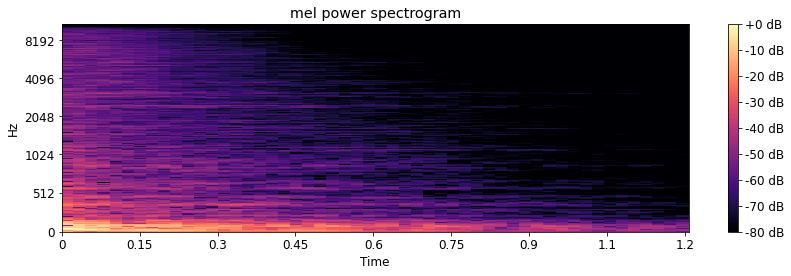

In [ ]:
num = 0
for drum_file in xtrain:
  #rmeove the silence at the begining and the end
  y,sr = librosa.load(drum_file)
  clip = librosa.effects.trim(y, top_db= 40)
  sf.write('11.wav', clip[0], sr)
  y1,sr1=librosa.load('/content/11.wav')
  thepath = f'spectrain/{drum_file.split("/")[-1]}/'

    #change to mel-spectrogram
  S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=550)
  log_S = librosa.power_to_db(S, ref=np.max)
  plt.figure(figsize=(12,4))
  spectrogram = librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')
  plt.title('mel power spectrogram')
  plt.colorbar(format='%+02.0f dB')
  plt.tight_layout()
  plt.savefig(path.join(thepath,str(num).zfill(4)))
  num = num +1
  


TypeError: ignored

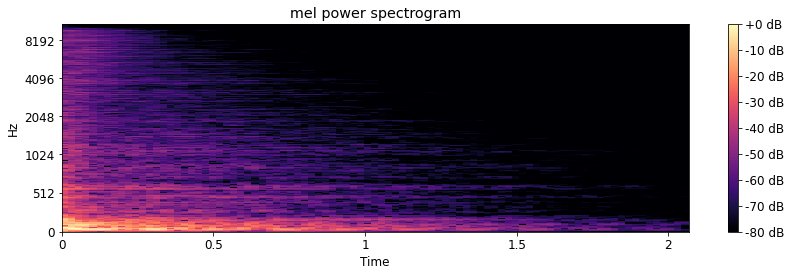

In [ ]:
num = 0
for drum_file in xtest:
  #rmeove the silence at the begining and the end
  y,sr = librosa.load(drum_file)
  clip = librosa.effects.trim(y)
  sf.write('11.wav', clip[0], sr)
  y1,sr1=librosa.load('/content/11.wav')
  thepath = f'spectest/'

    #change to mel-spectrogram
  S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=550)
  log_S = librosa.power_to_db(S, ref=np.max)
  plt.figure(figsize=(12,4))
  spectrogram = librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')
  plt.title('mel power spectrogram')
  plt.colorbar(format='%+02.0f dB')
  plt.tight_layout()
  plt.savefig(path.join(thepath,str(num).zfill(4)))
  num = num +1
  


# Time to learn the tempo

# Train

In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/spectrain.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
lesg = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)
path = '/content/spectrain'
dls = lesg.dataloaders(path,batch_size=4)
learner = cnn_learner(dls, resnet50, metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learner.lr_find() #0.0008317637839354575

In [ ]:
learner.fine_tune(epochs=6, base_lr=0.0008)

epoch,train_loss,valid_loss,accuracy,time
0,0.549462,61.259262,0.068334,29:55


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learner.export("drum.pkl")

In [ ]:
!zip -r /content/spectrain.zip /content/spectrain